* Create a total of eight polynomials from degree 1 to 8. Compute and print training MSE and validation MSE values for each of them. Validation MSE should be computed using LOOCV (use the function that we already created). Draw a plot with two curves analogous to the plot shown in slide 9 from today's lecture. Add a legend so that it is clear which curve is which.


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut

In [49]:
# Datos
X = np.array([-3.00, -2.54, -2.08, -1.62, -1.15, -0.69, -0.23,  0.23,  0.69,  1.15,  1.62,  2.08,  2.54,  3.00]).reshape(-1, 1)
y = np.array([ 2.60,  2.81,  3.49,  4.08,  3.30,  3.43,  4.59,  4.65,  4.79,  6.45,  7.58,  9.78, 12.98, 15.49]).reshape(-1, 1)


In [50]:
# Inicializamos LOOCV
loocv = LeaveOneOut()

In [51]:
# Listas para guardar los errores de entrenamiento y validación
errores_entrenamiento = []
errores_validacion = []

In [52]:
# Modelo de regresión lineal
modelo = LinearRegression()

In [53]:
# Iteramos por cada grado polinómico (1 a 8)
for grado in range(1, 9):
    # Generamos las características polinómicas para el grado actual
    polinomio = PolynomialFeatures(degree=grado)
    X_polinomico = polinomio.fit_transform(X)

    # Ajustamos el modelo con los datos completos (para obtener el MSE de entrenamiento)
    modelo.fit(X_polinomico, y)
    y_pred_entrenamiento = modelo.predict(X_polinomico)
    
    # Calculamos el MSE de entrenamiento
    mse_entrenamiento = mean_squared_error(y, y_pred_entrenamiento)
    errores_entrenamiento.append(mse_entrenamiento)

    # Ahora calculamos el MSE de validación utilizando LOOCV
    errores_validacion_loocv = []

    for train_index, test_index in loocv.split(X):
        # Datos de entrenamiento y prueba para esta iteración de LOOCV
        X_train, X_test = X_polinomico[train_index], X_polinomico[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Entrenamos el modelo con el conjunto de entrenamiento
        modelo.fit(X_train, y_train)

        # Predicción en el dato de prueba
        y_pred_test = modelo.predict(X_test)

        # Calculamos el MSE para esta iteración de LOOCV
        mse_loocv = mean_squared_error(y_test, y_pred_test)
        errores_validacion_loocv.append(mse_loocv)

    # Promedio de los errores de validación (LOOCV)
    mse_validacion_promedio = np.mean(errores_validacion_loocv)
    errores_validacion.append(mse_validacion_promedio)

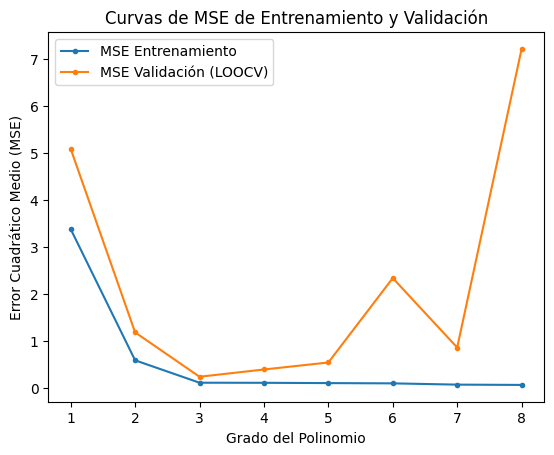

In [54]:
# Gráfico de los errores
grados = list(range(1, 9))
plt.plot(grados, errores_entrenamiento, label='MSE Entrenamiento', marker='.')
plt.plot(grados, errores_validacion, label='MSE Validación (LOOCV)', marker='.')
plt.xlabel('Grado del Polinomio')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Curvas de MSE de Entrenamiento y Validación')
plt.legend()
plt.show()

* Draw a plot showing all datapoints of the given dataset together with all eight polynomials from degree 1 to 8. Each curve should be in a different color. Add a legend so that it is clear which curve is which.

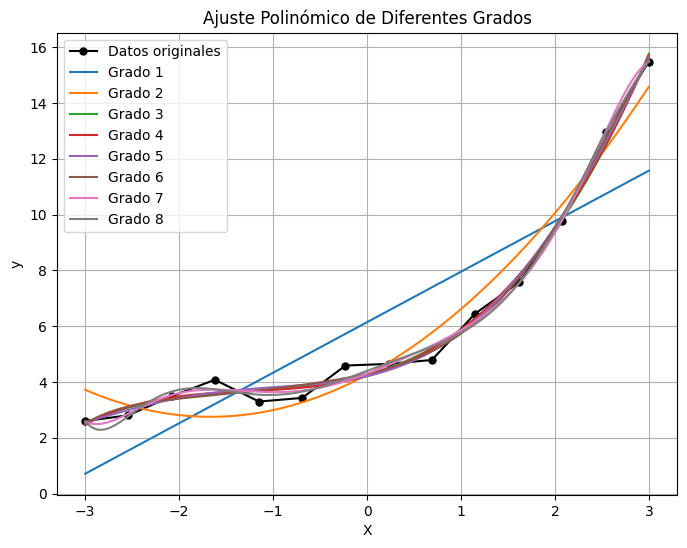

Grado 1: MSE Entrenamiento = 3.3815, MSE Validación = 5.0893
Grado 2: MSE Entrenamiento = 0.5880, MSE Validación = 1.1832
Grado 3: MSE Entrenamiento = 0.1111, MSE Validación = 0.2382
Grado 4: MSE Entrenamiento = 0.1092, MSE Validación = 0.3925
Grado 5: MSE Entrenamiento = 0.1029, MSE Validación = 0.5418
Grado 6: MSE Entrenamiento = 0.0973, MSE Validación = 2.3388
Grado 7: MSE Entrenamiento = 0.0703, MSE Validación = 0.8601
Grado 8: MSE Entrenamiento = 0.0641, MSE Validación = 7.2179


In [56]:
plt.figure(figsize=(8, 6))

plt.plot(X, y, color='black', label='Datos originales', linestyle='-', marker='.', markersize=10)

for grado in range(1, 9):
    polinomio = PolynomialFeatures(degree=grado)
    X_polinomico = polinomio.fit_transform(X)

    modelo = LinearRegression()
    modelo.fit(X_polinomico, y)

    X_range = np.linspace(min(X), max(X), 1000).reshape(-1, 1)
    X_range_polinomico = polinomio.transform(X_range)
    
    y_pred_range = modelo.predict(X_range_polinomico)

    plt.plot(X_range, y_pred_range, label=f'Grado {grado}')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Ajuste Polinómico de Diferentes Grados')
plt.legend()
plt.grid(True)
plt.show()

for grado in range(1, 9):
    print(f"Grado {grado}: MSE Entrenamiento = {errores_entrenamiento[grado-1]:.4f}, MSE Validación = {errores_validacion[grado-1]:.4f}")
